In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd    
from seaborn import lmplot
pd.options.mode.copy_on_write = True
from datetime import date
from datetime import datetime
import os

In [31]:
data = pd.read_excel(r"C:\Users\c-lop\Documents\GitHub\Mama_analisis\mama_muestra1_Analisis.xlsx")

In [32]:
data.describe()

,id_int,blank1,blank1.1,blank1.2,isocentros,camposverif,dosisFx,Fx,dosisTotal,contrastAgent,...,DosisTotal EntregadaPx,DosisXplan,free1,free2,PesoTotal,TotalTime,ComentarioStruct,level,d,h
count,192.000000,0.0,0.0,0.0,192.000000,192.000000,192.000000,192.000000,192.000000,0.0,...,192.0,192.0,0.0,0.0,192.000000,192.000000,0.0,184.0,189.000000,0.0
mean,96.500000,NaN,NaN,NaN,1.067708,2.963542,362.213542,10.713542,3285.171875,NaN,...,0.0,1.0,NaN,NaN,2.580831,262.156226,NaN,0.0,15.619048,NaN
std,55.569776,NaN,NaN,NaN,0.422655,1.118022,137.756828,5.252397,967.478499,NaN,...,0.0,0.0,NaN,NaN,0.857029,380.207813,NaN,0.0,8.783014,NaN
min,1.000000,NaN,NaN,NaN,1.000000,2.000000,200.000000,1.000000,800.000000,NaN,...,0.0,1.0,NaN,NaN,1.000000,41.657400,NaN,0.0,1.000000,NaN
25%,48.750000,NaN,NaN,NaN,1.000000,2.000000,267.000000,5.000000,2600.000000,NaN,...,0.0,1.0,NaN,NaN,2.000000,139.606980,NaN,0.0,9.000000,NaN
50%,96.500000,NaN,NaN,NaN,1.000000,2.000000,267.000000,15.000000,4005.000000,NaN,...,0.0,1.0,NaN,NaN,2.000000,153.891351,NaN,0.0,15.000000,NaN
75%,144.250000,NaN,NaN,NaN,1.000000,4.000000,520.000000,15.000000,4005.000000,NaN,...,0.0,1.0,NaN,NaN,3.293095,257.328222,NaN,0.0,24.000000,NaN
max,192.000000,NaN,NaN,NaN,4.000000,10.000000,800.000000,25.000000,5000.000000,NaN,...,0.0,1.0,NaN,NaN,4.025000,2160.000000,NaN,0.0,31.000000,NaN


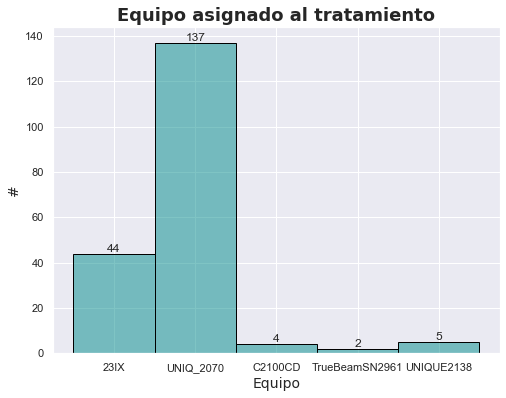

In [33]:
#Equipo
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.histplot(data["equipo"], color = "darkcyan", edgecolor = "black", alpha = 0.5)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.title("Equipo asignado al tratamiento",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("Equipo",size=14,fontname="DejaVu Sans")
plt.ylabel("#",size=14,fontname="DejaVu Sans")
plt.show()
#plt.savefig("equipo_hist.pdf",bbox_inches="tight")

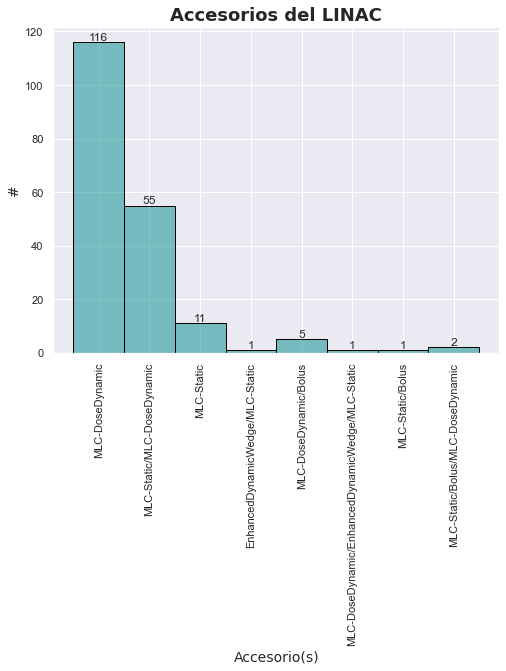

In [34]:
#Accesorios

ACC = data["accesorio"]

for i in range(len(data["accesorio"])-1):
    if ACC[i] == "MLC-DoseDynamic/MLC-Static":
        ACC[i] = "MLC-Static/MLC-DoseDynamic"
        
for i in range(len(data["accesorio"])-1):
    if ACC[i] == "MLC-DoseDynamic/Bolus/MLC-Static":
        ACC[i] = "MLC-Static/Bolus/MLC-DoseDynamic"

sns.set(rc={'figure.figsize':(8,6)})
ax = sns.histplot(ACC, color = "darkcyan", edgecolor = "black", alpha = 0.5)

for i in ax.containers:
    ax.bar_label(i,)

plt.title("Accesorios del LINAC",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("Accesorio(s)",size=14,fontname="DejaVu Sans")
plt.ylabel("#",size=14,fontname="DejaVu Sans")
plt.xticks(rotation='vertical')
plt.show()
#plt.savefig("accesorios_hist.pdf",bbox_inches="tight")

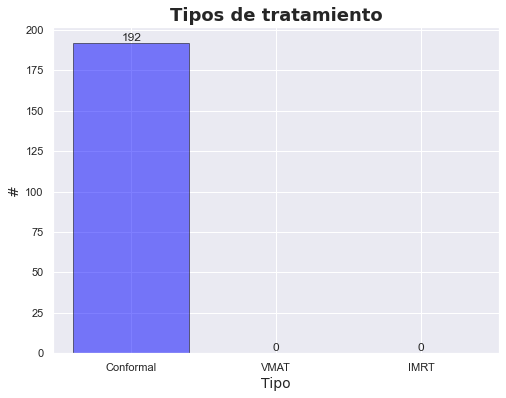

In [35]:
#Tipo de tratamiento

id_VMAT = []
id_IMRT = []
id_conf = []

for i in range(len(data["accesorio"])):
    if MA["accesorio"][i] == "MLC-VMAT":
        id_VMAT.append(data["pacienteid"][i])
    elif MA["accesorio"][i] == "MLC-IMRT":
        id_IMRT.append(data["pacienteid"][i])
    else:
        id_conf.append(data["pacienteid"][i])

counts = [len(id_conf),len(id_VMAT), len(id_IMRT)]
labels = ['Conformal','VMAT', 'IMRT']

sns.set(rc={'figure.figsize':(8,6)})
bars = plt.bar(labels, counts, color=['blue', 'orange', 'green'], edgecolor="black", alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, str(height), ha='center', va='bottom', fontsize=12)

plt.title("Tipos de tratamiento",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("Tipo",size=14,fontname="DejaVu Sans")
plt.ylabel("#",size=14,fontname="DejaVu Sans")
plt.xticks()
plt.show()
#plt.savefig("tipos_trat.pdf",bbox_inches="tight")

Advertencia: No hay datos para el tipo 'VMAT'.


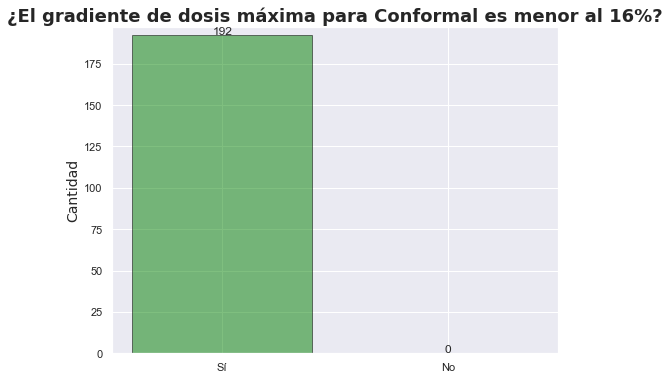

Advertencia: No hay datos para el tipo 'IMRT'.


In [36]:
# Gradiente máximo por tipo de tratamiento

grad_max = {
    'Conformal': 16,  # gradiente máximo para Conformal
    'VMAT': 12,       # gradiente máximo para VMAT
    'IMRT': 12        # gradiente máximo para IMRT
}

gradientes_clasificados = []

for i in range(len(data["pacienteid"])):
    paciente_id = data["pacienteid"][i]
    gradiente = (data["DoseMax3D"][i] / data["dosisTotal"][i]) * 100 - 100

    if paciente_id in id_VMAT:
        tipo = 'VMAT'
    elif paciente_id in id_IMRT:
        tipo = 'IMRT'
    elif paciente_id in id_conf:
        tipo = 'Conformal'
    else:
        continue

    limite = grad_max[tipo]
    if gradiente <= limite:
        gradientes_clasificados.append(('Sí', gradiente, tipo))
    else:
        gradientes_clasificados.append(('No', gradiente, tipo))

df_gradientes = pd.DataFrame(gradientes_clasificados, columns=['Estado', 'Gradiente', 'Tipo'])

data_agrupada = df_gradientes.groupby(["Tipo", "Estado"]).size().unstack(fill_value=0)

sns.set(rc={'figure.figsize': (8, 6)})

colors = {"Sí": "green", "No": "red"}
orden = ["Sí", "No"]

tipos = ["VMAT", "Conformal", "IMRT"]

for tipo in tipos:
    if tipo not in data_agrupada.index:
        print(f"Advertencia: No hay datos para el tipo '{tipo}'.")
        continue

    valores = data_agrupada.loc[tipo].reindex(orden, fill_value=0)
    labels = valores.index
    counts = valores.values

    plt.bar(labels, counts, color=[colors[label] for label in labels], alpha=0.5, edgecolor="black")
    for i, value in enumerate(counts):
        plt.text(i, value + 0.5, str(value), ha='center', fontsize=12)

    limite = grad_max[tipo]
    plt.title(f"¿El gradiente de dosis máxima para {tipo} es menor al {limite}%?", 
              size=18, fontname="DejaVu Sans", fontweight="bold")
    plt.ylabel("Cantidad", fontname="DejaVu Sans", size=14)
    plt.ylim(0, max(counts) + 5)
    plt.show()

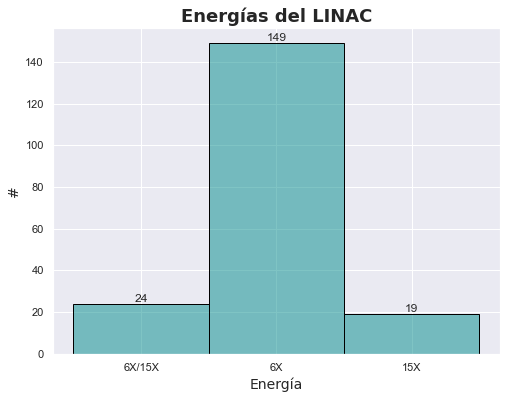

In [37]:
#Energías

EE = data["energia"]

for i in range(len(data["accesorio"])-1):
    if EE[i] == "15X/6X":
        EE[i] = "6X/15X"

sns.set(rc={'figure.figsize':(8,6)})
ax = sns.histplot(EE, color = "darkcyan", edgecolor = "black", alpha = 0.5)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.title("Energías del LINAC",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("Energía",size=14,fontname="DejaVu Sans")
plt.ylabel("#",size=14,fontname="DejaVu Sans")
plt.show()
#plt.savefig("energias_hist.pdf",bbox_inches="tight")

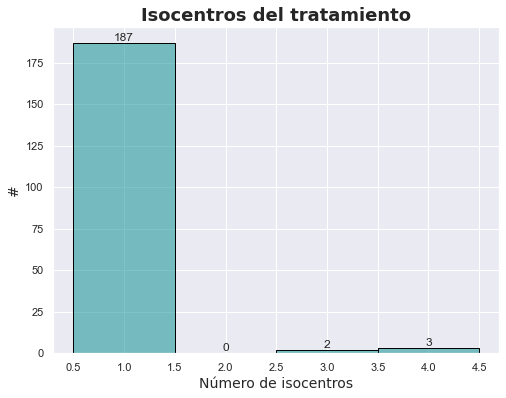

In [38]:
#Isocentros
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.histplot(data["isocentros"], color = "darkcyan", edgecolor = "black", alpha = 0.5, discrete=True)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.title("Isocentros del tratamiento",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("Número de isocentros",size=14,fontname="DejaVu Sans")
plt.ylabel("#",size=14,fontname="DejaVu Sans")
plt.show()
#plt.savefig("isocentros_hist.pdf",bbox_inches="tight")

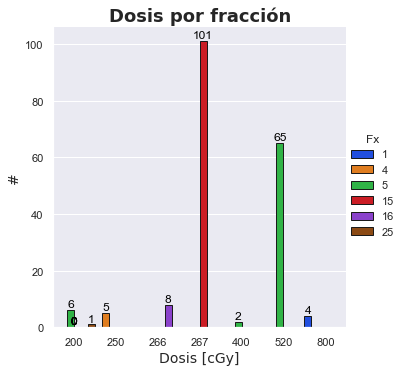

In [39]:
# Dosis por fracción
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.catplot(x=data["dosisFx"], hue=data["Fx"], kind="count", palette="bright", edgecolor="k", width=1)

for p in ax.ax.patches:
    ax.ax.text(p.get_x() + p.get_width()/2, p.get_height() + 1, int(p.get_height()), ha="center", va="baseline", fontsize=12, color="black")

plt.title("Dosis por fracción", size=18, fontname="DejaVu Sans", fontweight="bold")
plt.xlabel("Dosis [cGy]", size=14, fontname="DejaVu Sans")
plt.ylabel("#", size=14, fontname="DejaVu Sans")
plt.show()
#plt.savefig("dosis_fraccion.pdf", bbox_inches="tight")

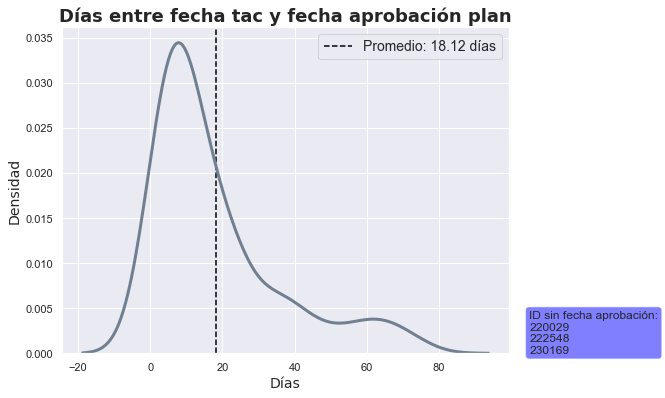

In [42]:
#Días entre fecha tac y fecha aprobación plan
days = np.zeros(len(data["fechaaprobplan"]))
days_plot = []
no_aprob = []

for i in range(len(days)):
    if pd.isna(MA["fechaaprobplan"][i]):
        no_aprob.append(MA["pacienteid"][i])
        continue
    aprob = date(int(data["fechaaprobplan"][i][0:4]), int(data["fechaaprobplan"][i][5:7]), int(data["fechaaprobplan"][i][8:10]))
    tac = date(int(data["fechatac"][i][0:4]), int(data["fechatac"][i][5:7]), int(data["fechatac"][i][8:10]))
    days[i] = (aprob - tac).days
    days_plot.append((aprob - tac).days)
    
id_no_dias_aprob = []
count_no_dias_aprob = 0
    
for i in range(len(days_plot)):
    if days[i] > 90:
        count_no_dias_aprob += 1
        id_no_dias_aprob.append(data["pacienteid"][i])

count_si_dias_aprob = len(days_plot) - count_no_dias_aprob

#

mean_days = np.mean(days_plot)
std_days = np.std(days_plot)

textstr = "ID sin fecha aprobación:\n" + '\n'.join(map(str, no_aprob))
props = dict(boxstyle='round', facecolor='blue', alpha=0.5)

sns.set(rc={'figure.figsize':(8,6)})

plt.axvline(mean_days, color="black", linestyle="--", label=f"Promedio: {mean_days:.2f} días")

ax = sns.kdeplot(days_plot,color = "slategrey", linewidth= 3, alpha = 1)
sns.set(rc={'figure.figsize':(8,6)})
plt.title("Días entre fecha tac y fecha aprobación plan",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("Días",size=14,fontname="DejaVu Sans")
plt.ylabel("Densidad",size=14,fontname="DejaVu Sans")
#plt.xlim([np.min(days),np.max(days)])
plt.text(np.max(days)*1.4,0, textstr, bbox=props)
plt.legend(fontsize=14)
plt.show()
#plt.savefig("dias_tac_aprob.pdf",bbox_inches="tight")

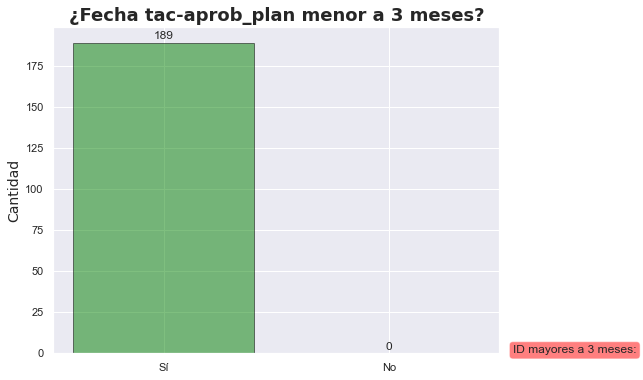

In [43]:
#¿Fecha tac-aprob_plan menor a 3 meses?
días_aprob = [count_si_dias_aprob,count_no_dias_aprob]
labels = ['Sí', 'No']

textstr2 = "ID mayores a 3 meses:" + '\n'.join(map(str, id_no_dias_aprob))
props2 = dict(boxstyle='round', facecolor='red', alpha=0.5)

sns.set(rc={'figure.figsize':(8,6)})

for i, value in enumerate(días_aprob):
    plt.text(i, value + 2, str(value), ha='center', fontsize=12)

plt.bar(labels, días_aprob, color=['green','red'], alpha=0.5, edgecolor = "black")
plt.title("¿Fecha tac-aprob_plan menor a 3 meses?",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.ylabel("Cantidad",size=14,fontname="DejaVu Sans")
plt.text(1.55, 0, textstr2, bbox=props2)
plt.show()
#plt.savefig("menor3meses_tac_aprob.pdf",bbox_inches="tight")

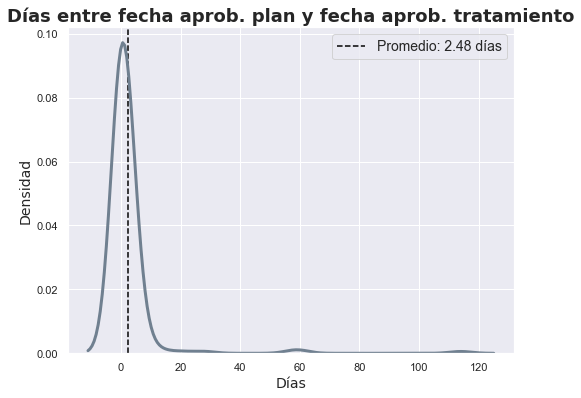

In [44]:
#Días entre fecha aprob. plan y fecha aprob. tratamiento
days2 = np.zeros(len(data["fechaaprobplan"]))
days_plot2 = []
no_aprob = []

for i in range(len(days)):
    if pd.isna(data["fechaaprobplan"][i]):
        no_aprob.append(data["pacienteid"][i])
        continue
    aprob = date(int(data["fechaaprobplan"][i][0:4]), int(data["fechaaprobplan"][i][5:7]), int(data["fechaaprobplan"][i][8:10]))
    trata = date(int(data["fechaaprobtratamiento"][i][0:4]), int(data["fechaaprobtratamiento"][i][5:7]), int(data["fechaaprobtratamiento"][i][8:10]))
    days2[i] = (trata - aprob).days
    days_plot2.append((trata - aprob).days)
    
#
    
mean_days2 = np.mean(days_plot2)
std_days2 = np.std(days_plot2)

sns.set(rc={'figure.figsize':(8,6)})

plt.axvline(mean_days2, color="black", linestyle="--", label=f"Promedio: {mean_days2:.2f} días")

ax = sns.kdeplot(days_plot2,color = "slategrey", linewidth= 3, alpha = 1)
plt.title("Días entre fecha aprob. plan y fecha aprob. tratamiento",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("Días",size=14,fontname="DejaVu Sans")
plt.ylabel("Densidad",size=14,fontname="DejaVu Sans")
#plt.xlim([np.min(days),np.max(days)])
plt.legend(fontsize=14)
plt.show()
#plt.savefig("dias_tac_trat.pdf",bbox_inches="tight")

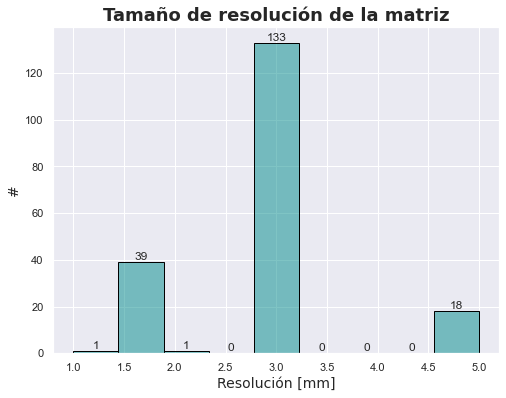

In [45]:
#Resolucion de la matriz
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.histplot(data["zres"], color = "darkcyan", edgecolor = "black", alpha = 0.5)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.title("Tamaño de resolución de la matriz",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("Resolución [mm]",size=14,fontname="DejaVu Sans")
plt.ylabel("#",size=14,fontname="DejaVu Sans")
plt.show()
#plt.savefig("resolucion_hist.pdf",bbox_inches="tight")

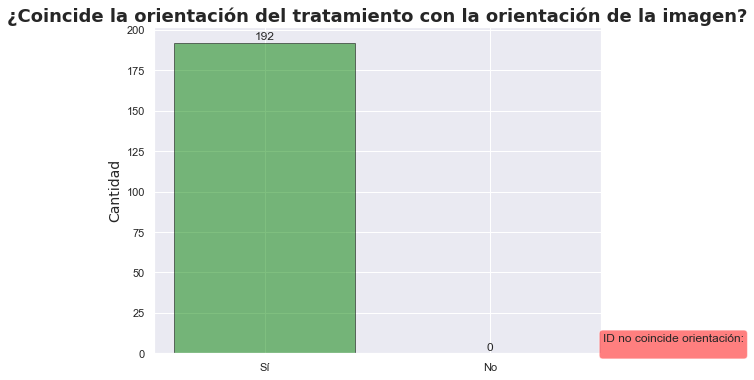

In [46]:
#¿Coincide la orientación del tratamiento con la orientación de la imagen?
no_orienta_count = 0
id_no_orienta = []

for img_orientacion, tratamiento_orientacion, paciente_id in zip(MA["orientacionImg"], MA["orientaciontratamiento"], MA["pacienteid"]):
    if img_orientacion != tratamiento_orientacion:
        no_orienta_count += 1
        id_no_orienta.append(paciente_id)

si_orienta_count = len(data["orientacionImg"]) - no_orienta_count

#

orienta = [si_orienta_count,no_orienta_count]
labels = ['Sí', 'No']

textstr3 = "ID no coincide orientación:\n" + '\n'.join(map(str, id_no_orienta))
props3 = dict(boxstyle='round', facecolor='red', alpha=0.5)

sns.set(rc={'figure.figsize':(8,6)})

for i, value in enumerate(orienta):
    plt.text(i, value + 2, str(value), ha='center', fontsize=12)

plt.bar(labels, orienta, color=['green','red'], alpha=0.5, edgecolor = "black")
plt.title("¿Coincide la orientación del tratamiento con la orientación de la imagen?",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.ylabel("Cantidad",size=14,fontname="DejaVu Sans")
plt.text(1.5, 0, textstr3, bbox=props3)
plt.show()
#plt.savefig("menor3meses_tac_aprob.pdf",bbox_inches="tight")

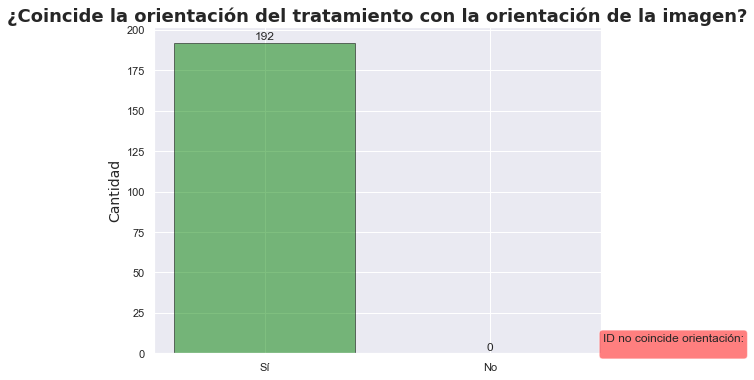

In [48]:
data['coincide_orientacion'] = data['orientacionImg'] == data['orientaciontratamiento']

si_orienta_count = data['coincide_orientacion'].sum()
no_orienta_count = len(data) - si_orienta_count

id_no_orienta = data.loc[~data['coincide_orientacion'], 'pacienteid'].tolist()

orienta = [si_orienta_count, no_orienta_count]
labels = ['Sí', 'No']

textstr3 = "ID no coincide orientación:\n" + '\n'.join(map(str, id_no_orienta))
props3 = dict(boxstyle='round', facecolor='red', alpha=0.5)

sns.set(rc={'figure.figsize': (8, 6)})
for i, value in enumerate(orienta):
    plt.text(i, value + 2, str(value), ha='center', fontsize=12)

plt.bar(labels, orienta, color=['green', 'red'], alpha=0.5, edgecolor="black")
plt.title("¿Coincide la orientación del tratamiento con la orientación de la imagen?", size=18, fontname="DejaVu Sans", fontweight="bold")
plt.ylabel("Cantidad", size=14, fontname="DejaVu Sans")
plt.text(1.5, 0, textstr3, bbox=props3)
plt.show()

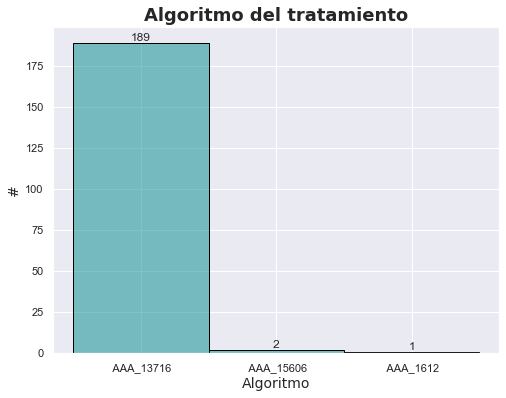

In [49]:
#Algoritmo del tratamiento
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.histplot(data["algoritmo"], color = "darkcyan", edgecolor = "black", alpha = 0.5)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.title("Algoritmo del tratamiento",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("Algoritmo",size=14,fontname="DejaVu Sans")
plt.ylabel("#",size=14,fontname="DejaVu Sans")
plt.show()
#plt.savefig("algoritmo_hist.pdf",bbox_inches="tight")

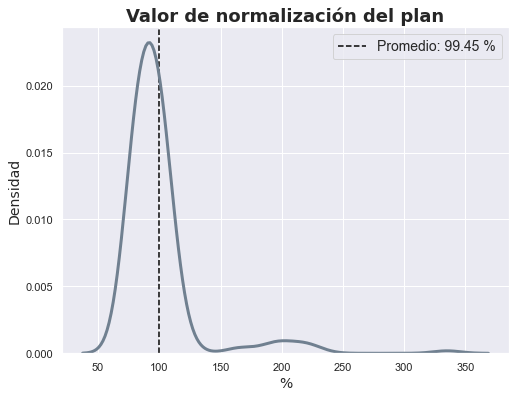

In [51]:
#Valor de normalización    
mean_norm = np.mean(data["normalizacionvalor"])
std_norm = np.std(data["normalizacionvalor"])

sns.set(rc={'figure.figsize':(8,6)})

plt.axvline(mean_norm, color="black", linestyle="--", label=f"Promedio: {mean_norm:.2f} %")
ax = sns.kdeplot(data["normalizacionvalor"],color = "slategrey", linewidth= 3, alpha = 1)
plt.title("Valor de normalización del plan",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("%",size=14,fontname="DejaVu Sans")
plt.ylabel("Densidad",size=14,fontname="DejaVu Sans")
plt.legend(fontsize=14)
plt.show()
#plt.savefig("kde_norm.pdf",bbox_inches="tight")

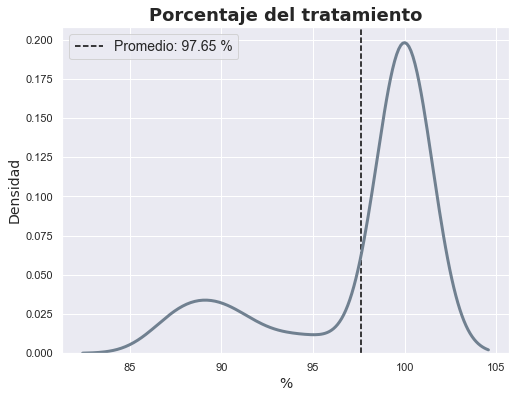

In [52]:
#Porcentaje tratamiento  
mean_port = np.mean(data["porcentajetratamiento"])
std_port = np.std(data["porcentajetratamiento"])

sns.set(rc={'figure.figsize':(8,6)})

plt.axvline(mean_port, color="black", linestyle="--", label=f"Promedio: {mean_port:.2f} %")
ax = sns.kdeplot(data["porcentajetratamiento"],color = "slategrey", linewidth= 3, alpha = 1)
plt.title("Porcentaje del tratamiento",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("%",size=14,fontname="DejaVu Sans")
plt.ylabel("Densidad",size=14,fontname="DejaVu Sans")
plt.legend(fontsize=14)
plt.show()
#plt.savefig("kde_port.pdf",bbox_inches="tight")

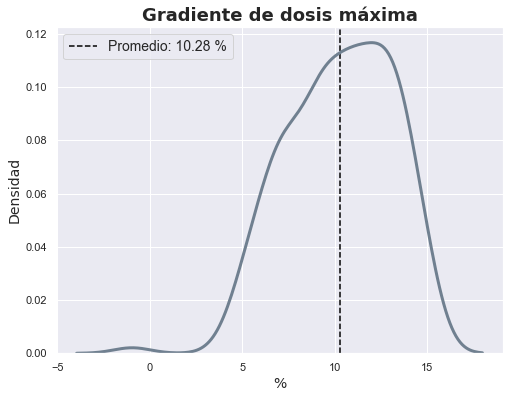

In [53]:
#Gradiente de dosis máxima
grad_dos = []

for i in range(len(data["DoseMax3D"])):
    grad_dos.append((data["DoseMax3D"][i]/data["dosisTotal"][i])*100-100)
    
#gradientes
    
mean_grad = np.mean(grad_dos)
std_grad = np.std(grad_dos)

sns.set(rc={'figure.figsize':(8,6)})

plt.axvline(mean_grad, color="black", linestyle="--", label=f"Promedio: {mean_grad:.2f} %")
ax = sns.kdeplot(grad_dos,color = "slategrey", linewidth= 3, alpha = 1)
plt.title("Gradiente de dosis máxima",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("%",size=14,fontname="DejaVu Sans")
plt.ylabel("Densidad",size=14,fontname="DejaVu Sans")
plt.legend(fontsize=14)
plt.show()
#plt.savefig("kde_grad_dos.pdf",bbox_inches="tight")

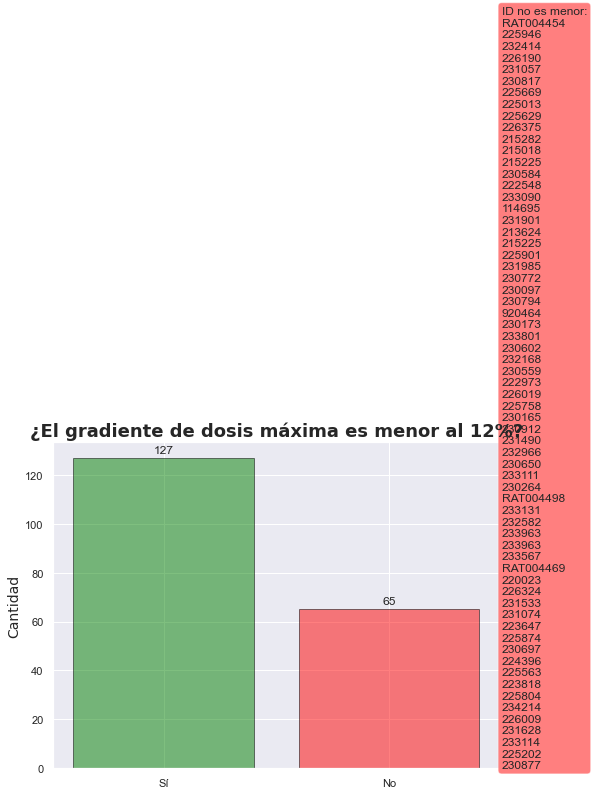

In [54]:
#¿El gradiente de dosis máxima es menor al 15%?
no_mengrad_count = 0
id_no_mengrad = []

for i in range(len(grad_dos)):
    if grad_dos[i] > 12:
        no_mengrad_count += 1
        id_no_mengrad.append(data["pacienteid"][i])

si_mengrad_count = len(grad_dos) - no_mengrad_count

#

grad = [si_mengrad_count,no_mengrad_count]
labels = ['Sí', 'No']

textstr4 = "ID no es menor:\n" + '\n'.join(map(str, id_no_mengrad))
props4 = dict(boxstyle='round', facecolor='red', alpha=0.5)

sns.set(rc={'figure.figsize':(8,6)})

for i, value in enumerate(grad):
    plt.text(i, value + 2, str(value), ha='center', fontsize=12)

plt.bar(labels, grad, color=['green','red'], alpha=0.5, edgecolor = "black")
plt.title("¿El gradiente de dosis máxima es menor al 12%?",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.ylabel("Cantidad",size=14,fontname="DejaVu Sans")
plt.text(1.5, 0, textstr4, bbox=props4)
plt.show()
#plt.savefig("menor_grad_dos.pdf",bbox_inches="tight")

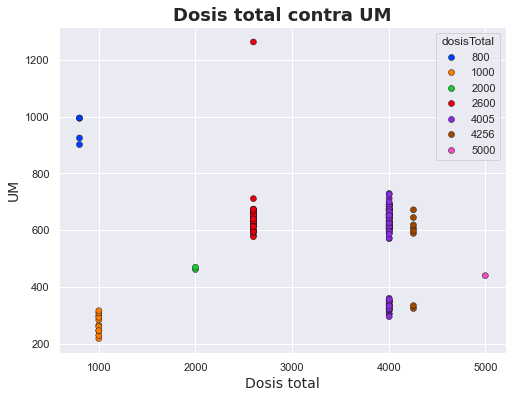

In [55]:
#Dosis total vs UM
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(x=data["dosisTotal"], y=data["UMtotal"], hue=data["dosisTotal"], palette="bright", legend="full", edgecolor="k")
plt.title("Dosis total contra UM", size=18, fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("Dosis total", fontname="DejaVu Sans", size=14)
plt.ylabel("UM", fontname="DejaVu Sans", size=14)
plt.show()
#plt.savefig("dos_vs_UM.pdf",bbox_inches="tight")

C:\Users\c-lop\AppData\Local\Temp\ipykernel_14264\797486176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["dosisTotal"], y=data["UMtotal"], palette="bright")


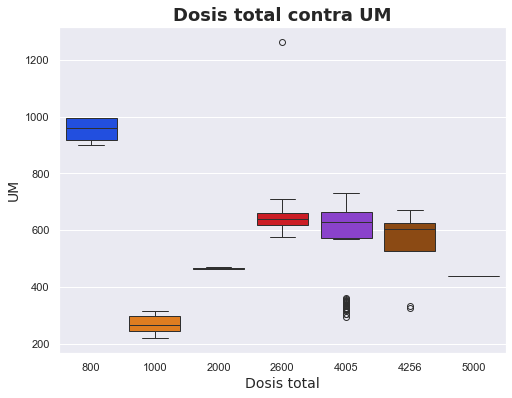

In [56]:
#Dosis total vs UM Boxplot
sns.set(rc={'figure.figsize': (8, 6)})
sns.boxplot(x=data["dosisTotal"], y=data["UMtotal"], palette="bright")
plt.title("Dosis total contra UM", size=18, fontname="DejaVu Sans", fontweight="bold")
plt.xlabel("Dosis total", fontname="DejaVu Sans", size=14)
plt.ylabel("UM", fontname="DejaVu Sans", size=14)
plt.show()
# plt.savefig("dos_vs_UM_boxplot.pdf", bbox_inches="tight")


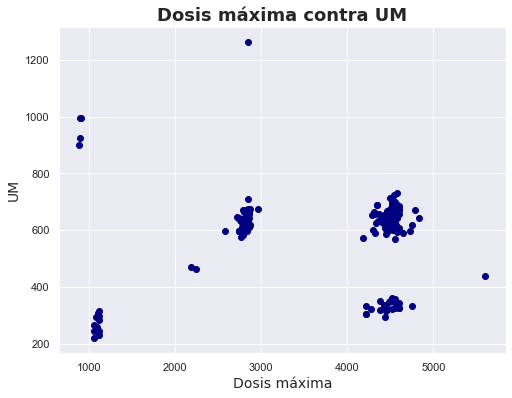

In [57]:
#Dosis máxima vs UM
sns.set(rc={'figure.figsize':(8,6)})
plt.scatter(data["DoseMax3D"],data["UMtotal"],color="navy")
plt.title("Dosis máxima contra UM",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("Dosis máxima",size=14,fontname="DejaVu Sans")
plt.ylabel("UM",size=14,fontname="DejaVu Sans")
plt.show()
#plt.savefig("dosmax_vs_UM.pdf",bbox_inches="tight")

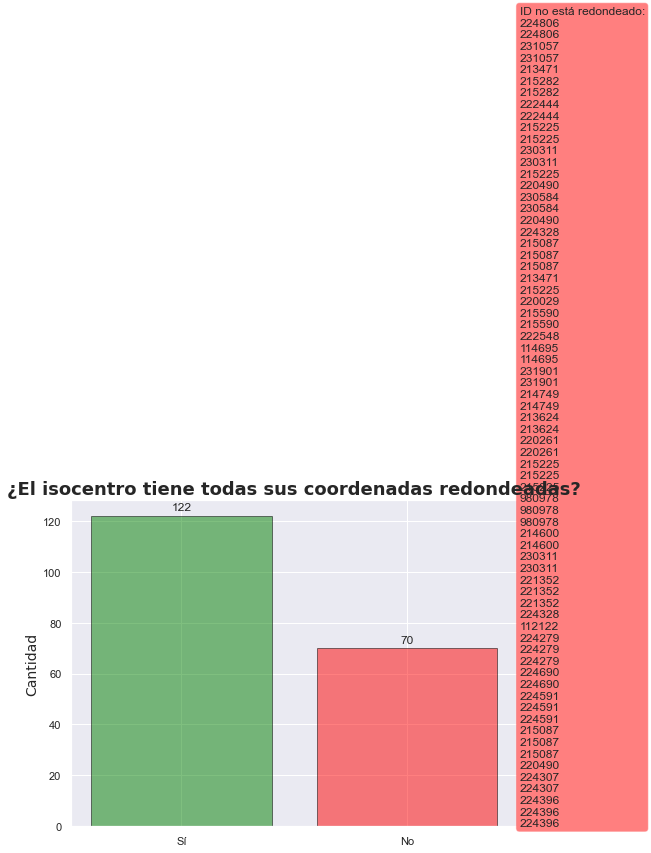

In [58]:
#¿El isocentro tiene todas sus coordenadas redondeadas?
no_red_count = 0
id_no_red = []

for i in range(len(MA["isocoordenada"])):
    num = MA["isocoordenada"][i].split(",")
    for n in range(len(num)):
        if float(num[n]) % 0.5 != 0:
            no_red_count += 1
            id_no_red.append(data["pacienteid"][i])
        else:
            continue
si_red_count = len(data["isocoordenada"]) - no_red_count

#

redon = [si_red_count,no_red_count]
labels = ['Sí', 'No']

textstr5 = "ID no está redondeado:\n" + '\n'.join(map(str, id_no_red))
props5 = dict(boxstyle='round', facecolor='red', alpha=0.5)

sns.set(rc={'figure.figsize':(8,6)})

for i, value in enumerate(redon):
    plt.text(i, value + 2, str(value), ha='center', fontsize=12)

plt.bar(labels, redon, color=['green','red'], alpha=0.5, edgecolor = "black")
plt.title("¿El isocentro tiene todas sus coordenadas redondeadas?",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.ylabel("Cantidad",size=14,fontname="DejaVu Sans")
plt.text(1.5, 0, textstr5, bbox=props5)
plt.show()
#plt.savefig("redondeo.pdf",bbox_inches="tight")

C:\Users\c-lop\AppData\Local\Temp\ipykernel_14264\1344235755.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data_filtered, color="slategrey", ax=axes[i], linewidth=3, alpha=1)


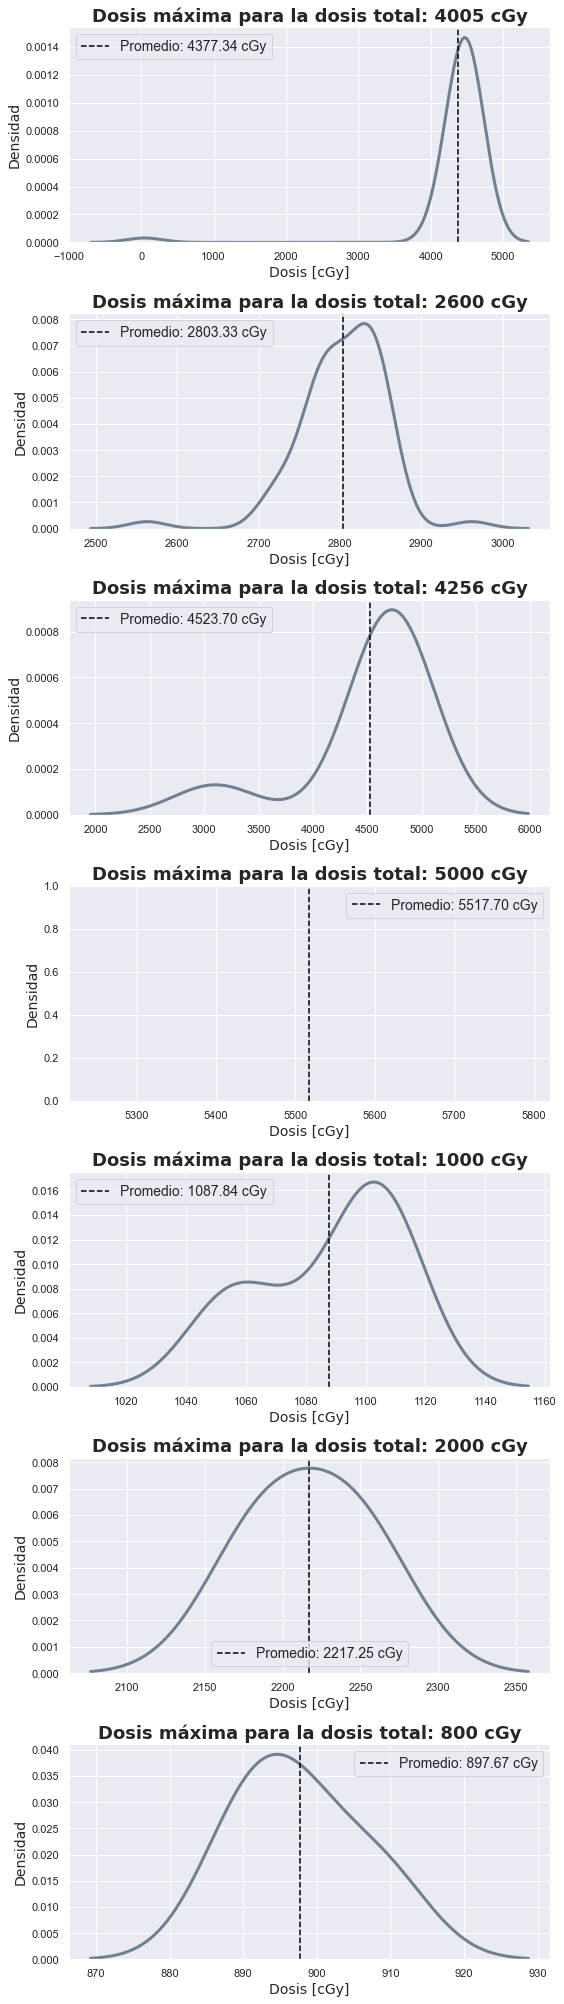

In [60]:
#Máximo de dosis
maxtarget = []

for i in range(len(data["maxtarget"])):
    x = MA["maxtarget"][i].rsplit(" cGy")
    maxtarget.append(float(x[0]))


df = pd.DataFrame({"maxtarget": maxtarget,"dosisTotal": data["dosisTotal"]})
unique_doses = df["dosisTotal"].unique()

num_doses = len(unique_doses)
fig, axes = plt.subplots(nrows=num_doses, ncols=1, figsize=(8, 4 * num_doses))

for i, dose in enumerate(unique_doses):
    data_filtered = df[df["dosisTotal"] == dose]["maxtarget"]
    
    mean_value = np.mean(data_filtered)
    std_value = np.std(data_filtered)
    
    sns.kdeplot(data=data_filtered, color="slategrey", ax=axes[i], linewidth=3, alpha=1)
    axes[i].axvline(mean_value, color="black", linestyle="--", label=f"Promedio: {mean_value:.2f} cGy")
    axes[i].set_title(f"Dosis máxima para la dosis total: {dose} cGy", size=18, fontname="DejaVu Sans", fontweight="bold")
    axes[i].set_xlabel("Dosis [cGy]", size=14, fontname="DejaVu Sans")
    axes[i].set_ylabel("Densidad", size=14, fontname="DejaVu Sans")
    axes[i].legend(fontsize=14)

plt.tight_layout()
plt.show()
#plt.savefig("kde_dos_max.pdf", bbox_inches="tight")

C:\Users\c-lop\AppData\Local\Temp\ipykernel_14264\3757930129.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data_filtered, color="slategrey", ax=axes[i], linewidth=3, alpha=1)


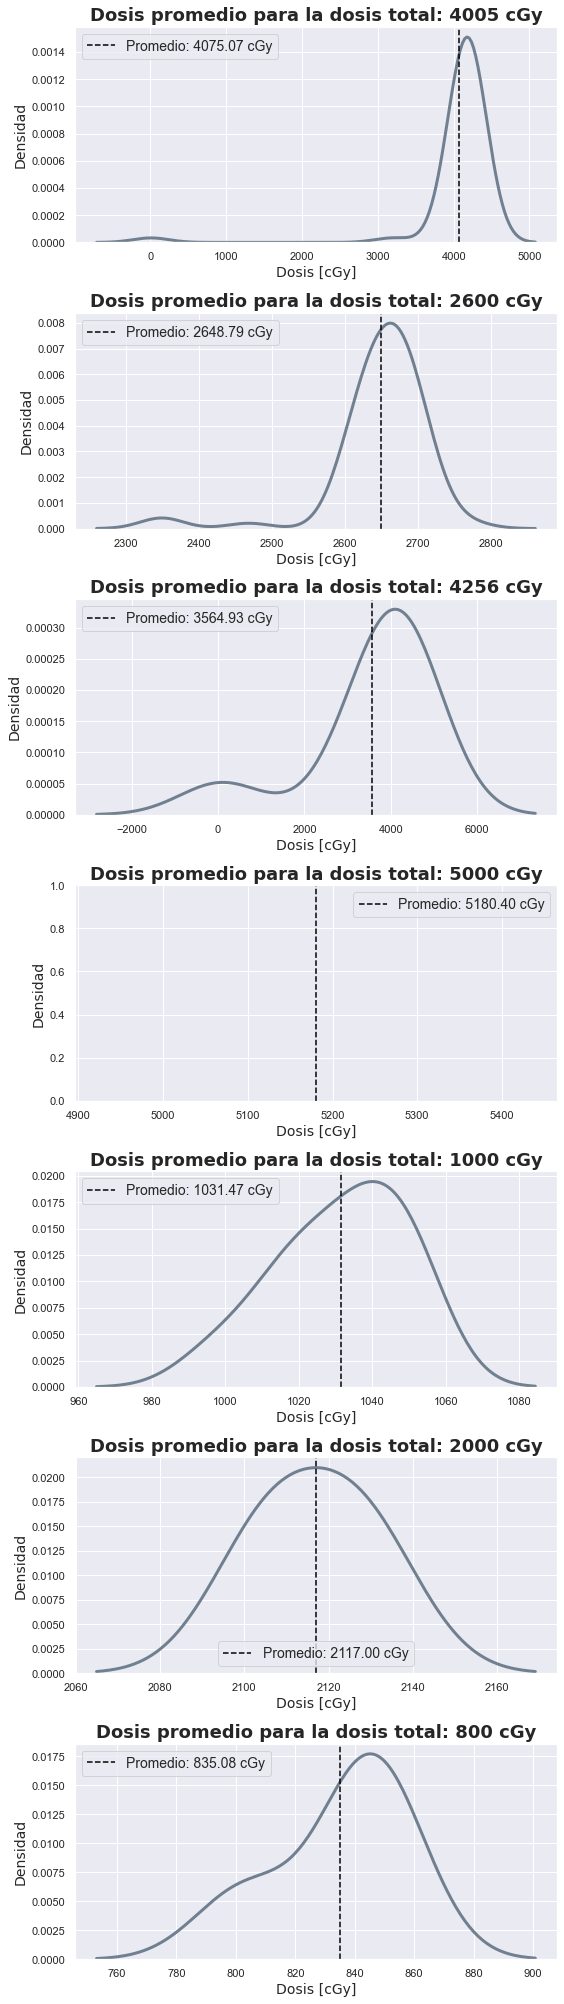

In [61]:
#Promedio de dosis
meantarget = []

for i in range(len(data["meantarget"])):
    x = MA["meantarget"][i].rsplit(" cGy")
    meantarget.append(float(x[0]))


df2 = pd.DataFrame({"meantarget": meantarget,"dosisTotal": data["dosisTotal"]})
unique_doses = df["dosisTotal"].unique()

num_doses = len(unique_doses)
fig, axes = plt.subplots(nrows=num_doses, ncols=1, figsize=(8, 4 * num_doses))

for i, dose in enumerate(unique_doses):
    data_filtered = df2[df2["dosisTotal"] == dose]["meantarget"]
    
    mean_value = np.mean(data_filtered)
    std_value = np.std(data_filtered)
    
    sns.kdeplot(data=data_filtered, color="slategrey", ax=axes[i], linewidth=3, alpha=1)
    axes[i].axvline(mean_value, color="black", linestyle="--", label=f"Promedio: {mean_value:.2f} cGy")
    axes[i].set_title(f"Dosis promedio para la dosis total: {dose} cGy", size=18, fontname="DejaVu Sans", fontweight="bold")
    axes[i].set_xlabel("Dosis [cGy]", size=14, fontname="DejaVu Sans")
    axes[i].set_ylabel("Densidad", size=14, fontname="DejaVu Sans")
    axes[i].legend(fontsize=14)

plt.tight_layout()
plt.show()
#plt.savefig("kde_dos_mean.pdf", bbox_inches="tight")

C:\Users\c-lop\AppData\Local\Temp\ipykernel_14264\1140602341.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data_filtered, color="slategrey", ax=axes[i], linewidth=3, alpha=1)


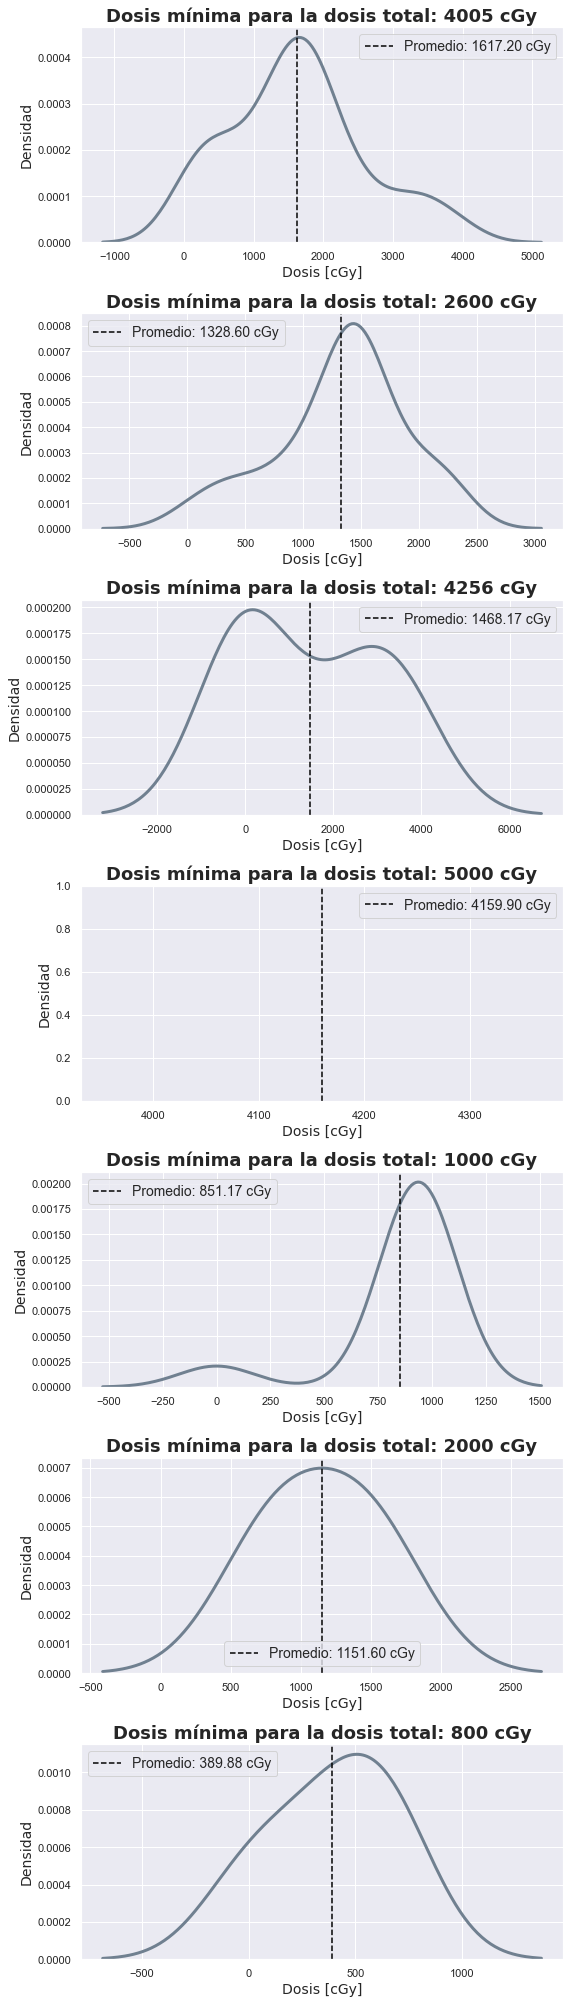

In [62]:
#Mínimo de dosis
mintarget = []

for i in range(len(data["mintarget"])):
    x = MA["mintarget"][i].rsplit(" cGy")
    mintarget.append(float(x[0]))


df3 = pd.DataFrame({"mintarget": mintarget,"dosisTotal": data["dosisTotal"]})
unique_doses = df["dosisTotal"].unique()

num_doses = len(unique_doses)
fig, axes = plt.subplots(nrows=num_doses, ncols=1, figsize=(8, 4 * num_doses))

for i, dose in enumerate(unique_doses):
    data_filtered = df3[df3["dosisTotal"] == dose]["mintarget"]
    
    mean_value = np.mean(data_filtered)
    std_value = np.std(data_filtered)
    
    sns.kdeplot(data=data_filtered, color="slategrey", ax=axes[i], linewidth=3, alpha=1)
    axes[i].axvline(mean_value, color="black", linestyle="--", label=f"Promedio: {mean_value:.2f} cGy")
    axes[i].set_title(f"Dosis mínima para la dosis total: {dose} cGy", size=18, fontname="DejaVu Sans", fontweight="bold")
    axes[i].set_xlabel("Dosis [cGy]", size=14, fontname="DejaVu Sans")
    axes[i].set_ylabel("Densidad", size=14, fontname="DejaVu Sans")
    axes[i].legend(fontsize=14)

plt.tight_layout()
plt.show()
#plt.savefig("kde_dos_min.pdf", bbox_inches="tight")

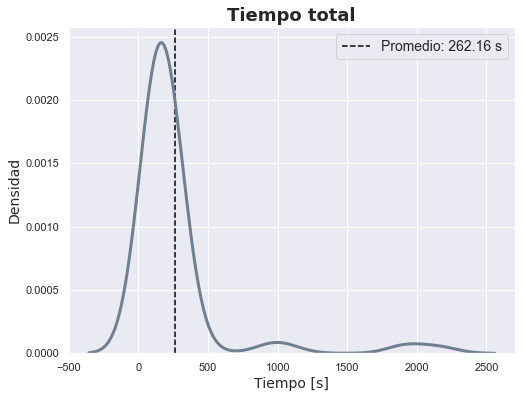

In [63]:
#Tiempo total
    
mean_grad = np.mean(data["TotalTime"])
std_grad = np.std(MA["TotalTime"])

sns.set(rc={'figure.figsize':(8,6)})

plt.axvline(mean_grad, color="black", linestyle="--", label=f"Promedio: {mean_grad:.2f} s")
ax = sns.kdeplot(data["TotalTime"],color = "slategrey", linewidth= 3, alpha = 1)
plt.title("Tiempo total",size=18,fontname="DejaVu Sans",fontweight="bold")
plt.xlabel("Tiempo [s]",size=14,fontname="DejaVu Sans")
plt.ylabel("Densidad",size=14,fontname="DejaVu Sans")
plt.legend(fontsize=14)
plt.show()
#plt.savefig("kde_tiempo_tot.pdf",bbox_inches="tight")